Primeiramente importaremos a biblioteca que iremos usar nesse projeto:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import unicodedata

Agora vamos importar o nosso dataframe, que nesse caso sera o "MICRODADOS_ENEM_2023.csv"

In [3]:
#Pegando o DataFrame puro do arquivo CSV
raw_df = pd.read_csv("MICRODADOS_ENEM_2023.csv", encoding='latin1', sep=';')

Antes de começarmos a realizar as nossas analizes estatisticas, devemos padronizar o nosso dataframe, removendo caracteres especiais como "ç", "à", "õ" e etc. Para que não ocorram conflitos durante o codigo

In [4]:
def standardize(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Autor: Arthur Veras

    Descrição:
        Padroniza os nomes das colunas do DataFrame:
        - Converte para minúsculas
        - Substitui espaços por underscores (_)
        - Remove acentos e caracteres especiais

    Parâmetros:
        dataframe (pd.DataFrame): DataFrame cujas colunas serão padronizadas.

    Retorno:
        pd.DataFrame: DataFrame com os nomes das colunas padronizados.
    """
    def remove_accents(text: str) -> str:
        """
       Descrição:
          - Remove todos os acentos (diacríticos) de uma determinada string, convertendo caracteres
            como 'á', 'ç' ou 'ê' em seus equivalentes átonos 'a', 'c' e 'e'.

       Parâmetros:
            text (str): A string de entrada contendo caracteres acentuados.

    Retorna:
         str: Uma nova string com todos os acentos removidos, preservando apenas os caracteres base.
        """
        normalized_text = unicodedata.normalize('NFKD', text)
        return ''.join([c for c in normalized_text if not unicodedata.combining(c)])

    new_columns = [
        remove_accents(columns).lower().replace(" ", "_")
        for columns in dataframe.columns
    ]
    dataframe.columns = new_columns

    return dataframe

Agora vamos atribuir o nosso novo dataframe padronizado à variavel "standardized_dataframe"

In [5]:
standardized_dataframe = standardize(raw_df)

Agora sim podemos começar a fazer as nossas analises, vamos começar com algo simples, e fazer um grafico mostrando as cidades que tiveram a maior quantidade de provas aplicadas, e para isso utilizaremos esse codigo:

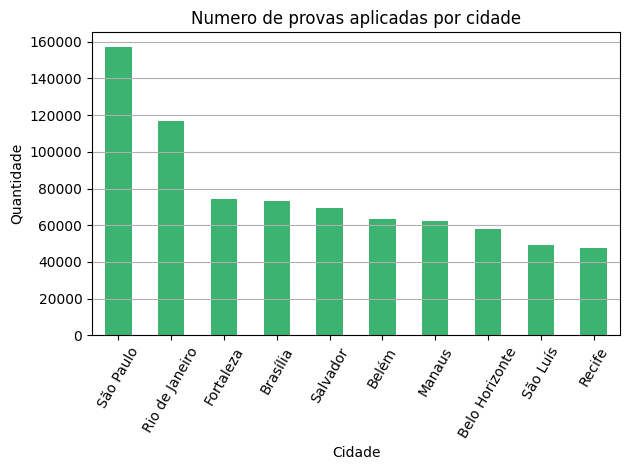

In [ ]:
def aplicacao_prova(dataframe: pd.DataFrame) -> plt:
    """
            Autor: Arthur Mourao
            Descrição: Esse codigo vai pegar contar a quantidade de vezes que cada cidade aparece na coluna "no_municipio_prova"
            e vai mostrar as 10 cidades que tiveram a maior aplicação de provas (usando o ".head(10)")
            
            Parâmetros:
            dataframe (Nesse caso o standardized_dataframe): DataFrame cujo tera as cidades na coluna "no_municipio_prova" contadas.

            Retorno:
            pd.DataFrame: DataFrame com os nomes das colunas padronizados.
    """
    dataframe["no_municipio_prova"].value_counts().head(10).plot(kind='bar', color='mediumseagreen')
    plt.title('Numero de provas aplicadas por cidade')
    plt.xlabel('Cidade')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.tight_layout()
    return plt.show()